In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mplhep as hep
import numpy as np
plt.style.use(hep.style.CMS)

In [2]:
def get_last_cms(mode = "expected"):
    
    if mode == "observed":
        x_pastCMS = [714.3856956996073, 741.2120037760287, 768.0396516605699, 794.8699791613506, 821.7157144555072, 848.5594400374846, 875.4118743722399, 902.2748038705995, 929.1602868056405, 956.0468862474477, 982.9401847298536, 1009.8363861298521, 1036.7542477611187, 1063.6647404477271, 1090.5893011195922, 1117.5185511198763, 1144.4299370118977, 1171.3406529998595, 1198.248019467522, 1225.1453373742868, 1252.0399756648121, 1278.933274147218, 1305.8285823418034, 1332.7165215917303, 1359.606470553837, 1386.493739899704, 1413.3856985739903,  1440.2796669604556,  1467.1722955388018, 1494.0669338293271,  1520.9640284347388, 1547.8530841914321, 1574.762237069921, 1595.5463454785863]
        y_pastCMS = [0.30531109961877073, 0.24304117752085747, 0.19417234832762392, 0.15625553695121103, 0.1310814938314596, 0.10936842697994169, 0.09342201017269482, 0.08209312377414239, 0.07666497230546326, 0.07181178642864972, 0.06849293137974734, 0.06584123919892425, 0.06710208729698035, 0.06704056411998886, 0.0695707954808653, 0.07311595740649464, 0.07322521209945422, 0.07320217378107309, 0.07252064860584927, 0.06992338881264813, 0.06693337841184627, 0.06383998397160388, 0.06122068364905337, 0.057552895454729254, 0.0543990809962003, 0.05104761285521983, 0.04851267315695512, 0.04635433515377192, 0.0441321669071636, 0.04224502098499008, 0.04070751667089862, 0.0383841703403417, 0.0382105714908378, 0.03713043324839548]

        return_dict = {}

        for x, y in zip(x_pastCMS, y_pastCMS):
            return_dict[x] = [y]

        return return_dict

    elif mode == "expected":
        
        points = {
            711.578870910066: [0.13285091064481958],
            741.3619703200428: [0.11694639996524867],
            767.8811684248167: [0.10571003795756423],
            797.2562801716431: [0.0945302619282405],
            826.6313919184695: [0.09039672866890545],
            856.0065036652959: [0.08796017178443716],
            885.8712006079027: [0.08709052830904013],
            911.8192159842661: [0.08336510326106564],
            942.907875916324: [0.07885322992949229],
            971.4670123368496: [0.07603215385234244],
            1000.4341364205256: [0.07210795736500553],
            1029.4012605042017: [0.06593968972485593],
            1059.9187377078488: [0.06078543111466614],
            1086.1115456821026: [0.0560367394472161],
            1113.0387314500267: [0.052990136776325955],
            1139.9659172179508: [0.05215763710751388],
            1166.893102985875: [0.05122599647366264],
            1193.8202887537993: [0.05043319410745734],
            1221.7674436795992: [0.04811549104958996],
            1248.250642872919: [0.04448826107709526],
            1273.4720340673093: [0.042525788502536035],
            1301.529031825496: [0.03974832325340899],
            1328.4562175934202: [0.03910110512176423],
            1354.4042329697836: [0.03878139549356087],
            1381.611181706725: [0.03933321289301129],
            1409.2377748971928: [0.03817807189126153],
            1438.6128866440192: [0.035968566422123725],
            1467.9879983908456: [0.03405570207937977],
            1497.363110137672: [0.03224456683950855],
            1526.7382218844982: [0.03224456683950855],
            1556.1133336313246: [0.031767557999572725],
            1585.488445378151: [0.030988173013546064]
        }
        
        return points

In [3]:
def get_theory_line(spin, source):
    
    # all entries are given in pb!!!
    
    # key is mass point, first entry is value, second entry is uncertainty
    # obtained from new spin 1/2 samples, using instructions from UHH2 wiki
    results_spin12_fromSamples = {
        800:  [1.523e-02, 7.861e-06],
        900:  [6.980e-03, 3.620e-06],
        1000: [3.401e-03, 2.065e-06],
        1100: [1.727e-03, 1.471e-06],
        1200: [9.011e-04, 1.196e-06],
        1300: [4.881e-04, 5.106e-07],
        1400: [2.679e-04, 1.260e-07],
        1500: [1.509e-04, 9.821e-08],
        1600: [8.715e-05, 7.965e-08],
        1700: [5.045e-05, 1.659e-08],
        1800: [3.019e-05, 3.736e-08],
        1900: [1.811e-05, 9.495e-09],
        2000: [1.115e-05, 5.473e-09],
        2250: [3.568e-06, 1.113e-09],
        2500: [1.261e-06, 4.723e-10],
        2750: [4.875e-07, 9.487e-11],
        3000: [1.982e-07, 6.478e-11],
    }
    
    # taken from page 51 on https://cms.cern.ch/iCMS/jsp/db_notes/noteInfo.jsp?cmsnoteid=CMS%20AN-2016/347
    results_spin32_prevAnalysis = {
        700:  [4.92],
        800:  [1.68],
        900:  [6.36e-1],
        1000: [2.62e-1],
        1100: [1.16e-1],
        1200: [5.37e-2],
        1300: [2.61e-2],
        1400: [1.31e-2],
        1500: [6.77e-3],
        1600: [3.59e-3]
    }
    
    results_spin32_theoryPaper = {
        815.95762: [2.01216],
        847.96101: [1.45149],
        879.96441: [1.08969],
        911.9678: [0.82702],
        943.9712: [0.61639],
        975.9746: [0.46951],
        1007.97799: [0.36352],
        1039.98139: [0.27791],
        1071.98478: [0.21556],
        1103.98818: [0.16842],
        1135.99158: [0.13159],
        1167.99497: [0.10356],
        1199.99837: [0.08225],
        1232.00176: [0.06556],
        1264.00516: [0.05178],
        1296.00856: [0.04142],
        1328.01195: [0.03326],
        1360.01535: [0.0268],
        1392.01874: [0.02187],
        1424.02214: [0.01765],
        1456.02553: [0.01438],
        1488.02893: [0.01176],
        1520.03233: [0.00963],
        1552.03572: [0.0079],
        1584.03912: [0.0065],
        1616.04251: [0.00536],
        1648.04591: [0.00441],
        1680.04931: [0.00365],
        1712.0527: [0.00304],
        1744.0561: [0.00251],
        1776.05949: [0.0021],
        1808.06289: [0.00175],
        1840.06629: [0.00146],
        1872.06968: [0.00121],
        1904.07308: [0.00101],
        1936.07647: [0.00085],
        1968.07987: [0.00072],
        1994.26447: [0.00062]
    }
    
    results_spin12_theoryPaper = {
        810.78535: [0.17472],
        841.77854: [0.13686],
        873.78193: [0.10851],
        906.87635: [0.08561],
        938.87975: [0.0684],
        970.88315: [0.05519],
        1002.57482: [0.04474],
        1035.98096: [0.03575],
        1067.98436: [0.02914],
        1099.98776: [0.02386],
        1131.99115: [0.01955],
        1163.99455: [0.01617],
        1195.99794: [0.01341],
        1228.00134: [0.01109],
        1260.00473: [0.00918],
        1290.60538: [0.00775],
        1324.01153: [0.00638],
        1354.61218: [0.00538],
        1386.92729: [0.00453],
        1418.93069: [0.00379],
        1450.93409: [0.00319],
        1482.93748: [0.00269],
        1512.96664: [0.00229],
        1544.97004: [0.00193],
        1577.85664: [0.00163],
        1609.86004: [0.00137],
        1639.31771: [0.00118],
        1671.32111: [0.001],
        1704.7792: [0.00085],
        1736.7826: [0.00072],
        1768.786: [0.00062],
        1803.69879: [0.00052],
        1835.70219: [0.00045],
        1867.70558: [0.00038],
        1901.16368: [0.00032],
        1934.62177: [0.00028],
        1966.62517: [0.00024],
        1997.17387: [0.00021]
    }
    
    # these are baseline and do not include the branching fraction!
    # derived ones with BR are below
    results_spin32_fromMG = {
        700: [4.68, 0.01331],
        1000: [0.2567, 0.0008],
        1300: [0.02532, 0.00005199],
        1600: [0.003431, 0.000007664],
        1900: [0.0005585, 0.000001162],
        2200: [0.000103, 0.0000002063],
        2500: [0.00002056, 0.00000004703],
        3000: [0.000001589, 0.000000003675],
    }
    
    results_spin12_fromMG = {
        700: [0.3242, 0.0005038],
        1000: [0.03293, 0.00006361],
        1300: [0.004995, 0.00000916],
        1600: [0.0009257, 0.000001532],
        1900: [0.0001923, 0.0000003857],
        2200: [0.00004277, 0.0000000816],
        2500: [0.000009808, 0.00000002417],
        3000: [0.000000896, 0.000000001867],
    }
    
    branching_fraction = 0.97 * 0.97
    
    results_spin32_fromMG_withBR = {mass : [results_spin32_fromMG[mass][0] * branching_fraction, results_spin32_fromMG[mass][1] * branching_fraction] for mass in results_spin32_fromMG}
    results_spin12_fromMG_withBR = {mass : [results_spin12_fromMG[mass][0] * branching_fraction, results_spin12_fromMG[mass][1] * branching_fraction] for mass in results_spin12_fromMG}
        
    # returning data
    if   (spin == 0.5 and source == "Samples"):          return results_spin12_fromSamples
    elif (spin == 0.5 and source == "TheoryPaper"):      return results_spin12_theoryPaper
    elif (spin == 0.5 and source == "MadGraph"):         return results_spin12_fromMG_withBR
    elif (spin == 0.5 and source == "MadGraph noBR"):    return results_spin12_fromMG
    elif (spin == 1.5 and source == "AnalysisNote"):     return results_spin32_prevAnalysis
    elif (spin == 1.5 and source == "TheoryPaper"):      return results_spin32_theoryPaper
    elif (spin == 1.5 and source == "MadGraph"):         return results_spin32_fromMG_withBR
    elif (spin == 1.5 and source == "MadGraph noBR"):    return results_spin32_fromMG
    else: raise Exception("Mode not recognized!")
    
    
# function to plot another line
# expects a dictionary, where the keys are x and the content is y
# content may be one or two numbers, the second being an uncertainty
def plot_other_line(line, label, ax, linestyle=None, color=None, plotUncertainty=False):
    
    x = list(line.keys())
    y = []
    err = []
    
    for x_ in x:
        y_tot = line[x_]
        y.append(y_tot[0])
        if(len(y_tot)>1): err.append(y_tot[1])
       
    # plotting the line
    ax.plot(x, y, label = label, linestyle = linestyle, color=color)

    if plotUncertainty and len(y_tot) > 1:
        # plotting error band
        lows = [y - error for y, error in zip(y, err)]
        highs = [y + error for y, error in zip(y, err)]

        ax.fill_between(x, lows, highs, color = color, alpha=0.5)


In [4]:
def load_limit(file):
    with open(file, 'r') as f:
        limits = [float(x[:-1].split(' ')[-1]) for x in f]
        if limits == []: return None, [None, None], [None, None]
        median = limits[2]
        cl_95 = [limits[0], limits[4]]
        cl_68 = [limits[1], limits[3]]
        return median, cl_68, cl_95
    
def load_limits(directory, year, observed=False):
    medians = []
    cl_68_ups = []
    cl_68_downs = []
    cl_95_ups = []
    cl_95_downs = []

    for masspoint in masspoints:
        if observed: filename = directory + "/AsymptoticLimits_" + year + "_" + str(masspoint) + "_" + channel + spinpostfix + "_observed.txt"
        else: filename = directory + "/AsymptoticLimits_" + year + "_" + str(masspoint) + "_" + channel + spinpostfix + ".txt"
        median, cl_68, cl_95 = load_limit(filename)

        medians.append(median)
        cl_68_downs.append(cl_68[0])
        cl_68_ups.append(cl_68[1])
        cl_95_downs.append(cl_95[0])
        cl_95_ups.append(cl_95[1])
        
    return np.asarray([medians, cl_68_ups, cl_68_downs, cl_95_ups, cl_95_downs], dtype=float)
    
def plot_skeleton(year):
    
    if (year == "UL18"): lumi = 59.83
    elif (year == "UL17"): lumi = 41.48
    elif (year == "UL16"): lumi = 36.31
    elif (year == ""): lumi = 137.62 
        
    fig, ax = plt.subplots(dpi=300, figsize=(12, 7))
    hep.cms.label("Work in progress", lumi=lumi, year=year.replace("UL", "20"), data=False, loc=0)
    
    return fig, ax

In [5]:
channel = "total"
masspoints = [700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2250, 2500, 2750]
spinpostfix = "_Spin32" # options are "" and "_32"

In [6]:
limits = load_limits("outputs", "")
#limits_observed = load_limits("outputs", "", observed = True)

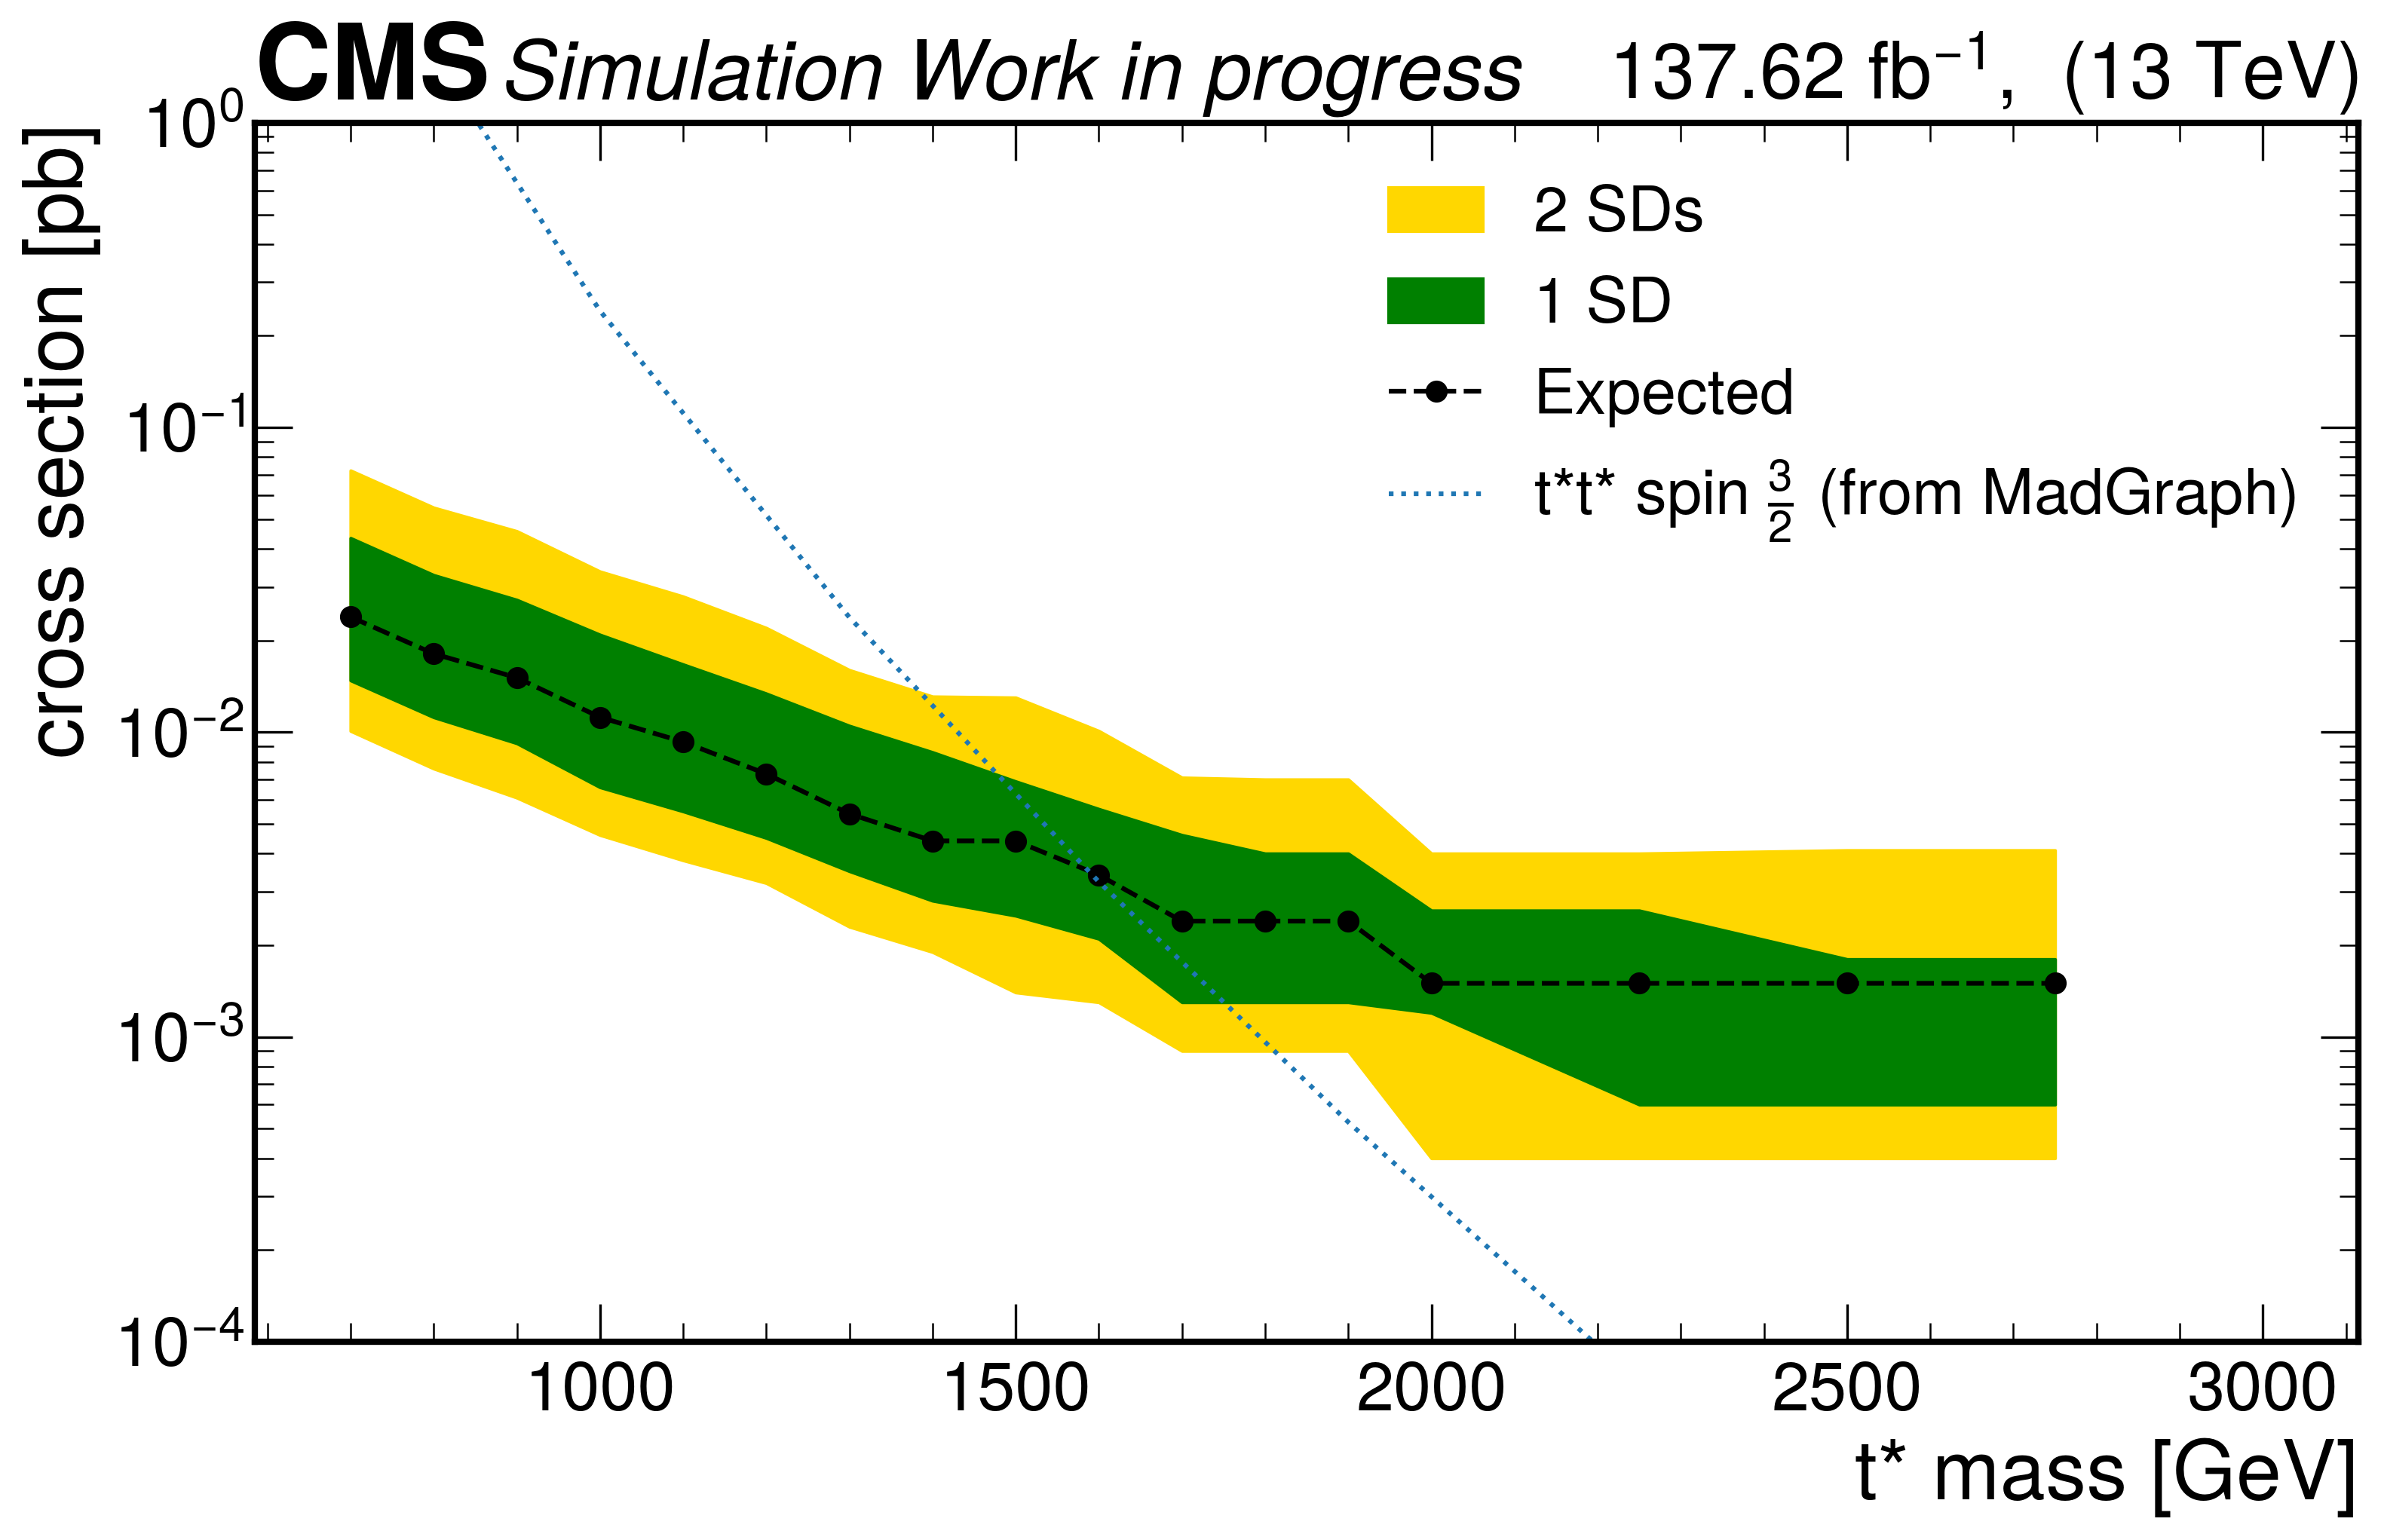

In [7]:
fig, ax = plot_skeleton("")

ax.fill_between(masspoints, limits[4], limits[3], color = 'gold', label = '2 SDs')
ax.fill_between(masspoints, limits[2], limits[1], color = 'g', label = '1 SD')
ax.plot(masspoints, limits[0], 'ko--', label = 'Expected')

#ax.plot(masspoints, limits_observed[0], 'kv-', label = 'Observed')

#plot_other_line(get_theory_line(spin = 0.5, source="MadGraph"), linestyle = ":", label = r"t*t* spin $\frac{1}{2}$ (from MadGraph)", ax=ax)
plot_other_line(get_theory_line(spin = 1.5, source="MadGraph"), linestyle = ":", label = r"t*t* spin $\frac{3}{2}$ (from MadGraph)", ax=ax)

#plot_other_line(get_last_cms("expected"), ax=ax, color="blue", label="2016 CMS expected")
#plot_other_line(get_last_cms("observed"), ax=ax, color="red", label="2016 CMS observed")

ax.set_yscale("log")

ax.set_xlabel("t* mass [GeV]")
ax.set_ylabel("cross section [pb]")

plt.legend(prop={'size': 20})

plt.ylim(1e-4, 1)

plt.show()